### Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
import joblib

### Model Testing

#### Loading the model using pickle file

In [2]:
model = joblib.load(r'..\models\text-emotion-classifier.joblib')

In [3]:
model

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

#### Loading the saved testing dataset

In [4]:
test = pd.read_csv('..\\dataset\\testing_dataset.csv')
test

,statement,emotion
0,i noticed several months ago that i d start fe...,anger
1,i love lots of different kinds of sports and l...,joy
2,i feel even if he killed himself it was becaus...,sadness
3,i feel numb the way a wound does before it rea...,sadness
4,i was quite the outsider due to my british men...,sadness
...,...,...
3995,i feel overwhelmed with the uncertainties of l...,surprise
3996,i must really be feeling brave because this th...,joy
3997,im feeling cranky im very defensive about it,anger
3998,i notice myself worrying about him i push that...,joy


#### Splitting the tested dataset into statement as x_test and emotion as y_test

In [5]:
x_test = test['statement']
y_test = test['emotion']

#### Predicting the values of the x_test values

In [6]:
pred = model.predict(x_test)

#### Comparing the actual emotions with the predicted emotions in form of a Dataframe

In [7]:
comp = pd.DataFrame()
comp['actual'] = y_test
comp['predicted'] = pred
comp

,actual,predicted
0,anger,anger
1,joy,joy
2,sadness,sadness
3,sadness,sadness
4,sadness,sadness
...,...,...
3995,surprise,sadness
3996,joy,joy
3997,anger,anger
3998,joy,joy


#### Finding out the percentages of correct predictions

In [8]:
f"{(len(comp[comp.actual==comp.predicted])/len(comp))*100}%"

'89.825%'

In [9]:
len(comp[comp.actual==comp.predicted])

3593

In [10]:
3593/4000

0.89825

### Model Evaluation

#### Calculating the accuracy score of the model

In [11]:
print(f"Accuracy Score of the Model : {accuracy_score(y_test,pred)*100:.2f}%")

Accuracy Score of the Model : 89.83%


#### Calculating the confusion matrix of the model

In [12]:
cm = confusion_matrix(y_test,pred)
print(f"Confusion Matrix of the Model :")
print(cm)

Confusion Matrix of the Model :
[[ 469   14   22    3   27    2]
 [  16  368   14    2   23   18]
 [   5   12 1253   37   24    3]
 [   4    2   58  260    6    0]
 [  22   16   21    6 1136    2]
 [   0   32   12    0    4  107]]


#### Plotting the confusion matrix of the model

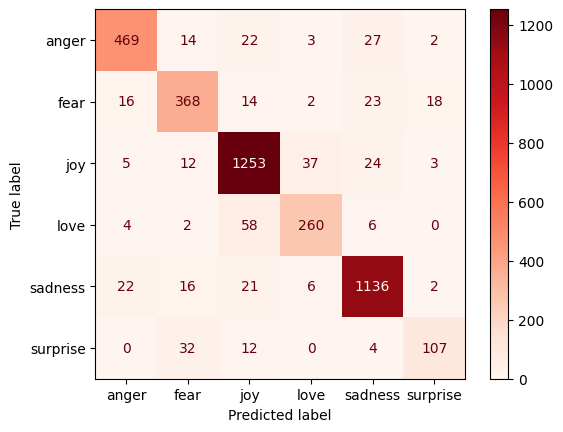

In [13]:
graph = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
graph.plot(cmap='Reds',values_format='d')

#### Calculating the classification report of the model

In [14]:
print("Classification Report of the model :")
print(classification_report(y_test,pred))

Classification Report of the model :
              precision    recall  f1-score   support

       anger       0.91      0.87      0.89       537
        fear       0.83      0.83      0.83       441
         joy       0.91      0.94      0.92      1334
        love       0.84      0.79      0.82       330
     sadness       0.93      0.94      0.94      1203
    surprise       0.81      0.69      0.75       155

    accuracy                           0.90      4000
   macro avg       0.87      0.84      0.86      4000
weighted avg       0.90      0.90      0.90      4000

